# Pittsburgh Neighborhood Crime Rates

##### In this notebook we will be looking at crime reports throughout Pittsburgh since 1/1/2016 to try and narrow down the top 10 safest Pittsburgh neighborhoods. Later we will compare with the other notebooks to narrow down the final decision on what is the best Pittsburgh neighborhood based off the metrics.

##### We will be using pandas to extract data from comma separated files that we got from Western Pennsylvania Regional Data Center

In [18]:
cleaned_lines = []
for line in lines:
    cleaned = line.replace('"', '')
    cleaned_lines.append(cleaned)
with open("CrimeReport_CLEAN.csv", "w", encoding="utf-8") as f:
    f.writelines(cleaned_lines)
print("Cleaned file written.")


Cleaned file written.


##### This writes a clean files that eliminated the needless clutter

In [19]:
import pandas as pd
df = pd.read_csv("CrimeReport_CLEAN.csv", on_bad_lines="skip", engine="python")
print("Loaded rows:", len(df))
print(df.columns.tolist())

Loaded rows: 101711
['_id', 'PK', 'CCR', 'HIERARCHY', 'INCIDENTTIME', 'INCIDENTLOCATION', 'CLEAREDFLAG', 'INCIDENTNEIGHBORHOOD', 'INCIDENTZONE', 'INCIDENTHIERARCHYDESC', 'OFFENSES', 'INCIDENTTRACT', 'COUNCIL_DISTRICT', 'PUBLIC_WORKS_DIVISION', 'X', 'Y']


##### This lists all of the headers that are usable with the new cleaned file

In [20]:
neigh_col = "INCIDENTNEIGHBORHOOD"
counts = df[neigh_col].value_counts().reset_index()
counts.columns = ["Neighborhood", "CrimeCount"]
lowest10 = counts.sort_values("CrimeCount").head(10)
print(lowest10)

                Neighborhood  CrimeCount
105                  OUTSIDE           3
104          Mt. Oliver Boro          22
103           Chartiers City          59
102           Outside County          61
101            Outside State          64
100                      OSC          74
99              Mount Oliver          89
98             New Homestead          99
97   Mt. Oliver Neighborhood         113
96            Swisshelm Park         128


##### Finally we see here the top 10 neighborhoods with the lowest crime numbers. Exclude the OUTSIDE "neighborhood" as those are irrelevant to this. The numbers on the far left are the IDs of each of the areas.

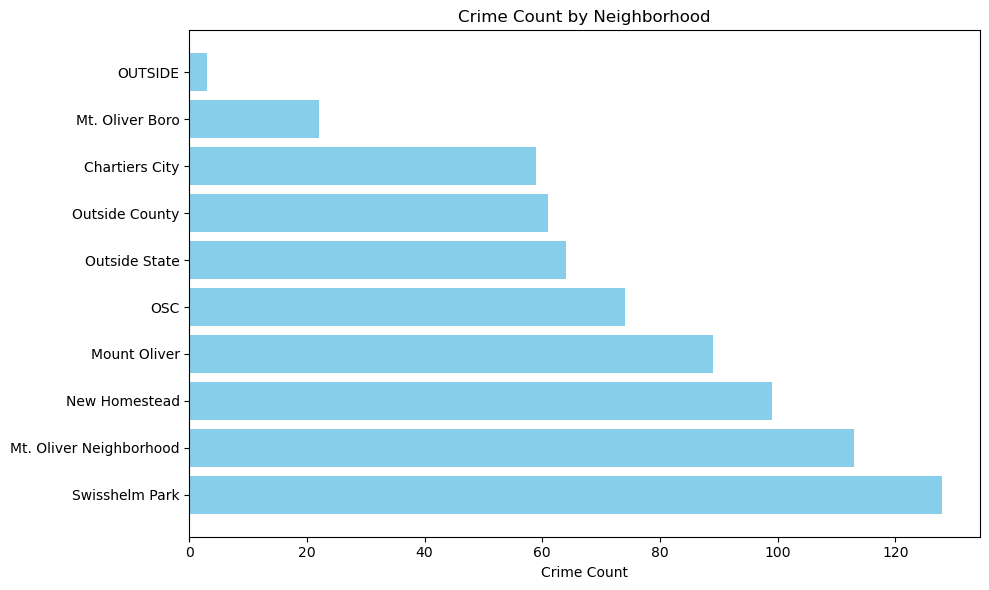

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
data = {
    'Neighborhood': [
        'OUTSIDE', 'Mt. Oliver Boro', 'Chartiers City', 'Outside County',
        'Outside State', 'OSC', 'Mount Oliver', 'New Homestead',
        'Mt. Oliver Neighborhood', 'Swisshelm Park'
    ],
    'CrimeCount': [3, 22, 59, 61, 64, 74, 89, 99, 113, 128]
}
df = pd.DataFrame(data)
plt.figure(figsize=(10, 6))
plt.barh(df['Neighborhood'], df['CrimeCount'], color='skyblue')
plt.xlabel('Crime Count')
plt.title('Crime Count by Neighborhood')
plt.gca().invert_yaxis()  # Optional: highest crime at top
plt.tight_layout()
plt.show()